<a href="https://colab.research.google.com/github/Pravalika320/Pravalika/blob/main/Final/Pravalika_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Impact of Socioeconomic Factors on Health Outcomes**

  This project aims to explore the intricate relationships between socioeconomic factors such as income, education, and race, and their influence on disparities in health outcomes. By integrating and analyzing datasets containing demographic, healthcare, and geographic information, the project seeks to uncover actionable insights that can guide policymakers, healthcare providers, and organizations in addressing health inequities.

  The analysis incorporates data on patients' income levels, marital status, ethnicity, and healthcare expenses, combined with encounter-level data detailing healthcare service utilization, costs, and class types. Additionally, geographic data in GeoJSON format enables spatial analysis to identify regional disparities in healthcare access and outcomes. Data transformation techniques, such as cleaning, categorization, and feature engineering, ensure a robust and consistent foundation for analysis.

This project leverages advanced data visualization techniques to illustrate disparities and highlight patterns in healthcare expenses, access, and outcomes across different population segments. For instance, visualizations will show healthcare spending across income groups, the impact of race on healthcare access, and geographic disparities in healthcare service utilization. By synthesizing these insights, the project aims to empower stakeholders to allocate resources equitably, develop targeted healthcare interventions, and ultimately reduce disparities in health outcomes for underserved communities.

## **Datasets Used**

**Dataset 1**

**Patients dataset**

* **Source:** https://www.kaggle.com/datasets/krsna540/synthea-dataset-jsons-ehr/data

* **Dataset Format:** Json Format

* **Dataset Description:** This dataset contains demographic, socioeconomic, and healthcare-related information for individuals, including unique identifiers (Id), personal details (name, birthdate, marital status, race, ethnicity, gender), geographic data (address, city, state, county, ZIP, latitude, longitude), and financial metrics (income, healthcare expenses, and coverage). It also includes sensitive identifiers like SSN, drivers’ license, and passport numbers, where available. The data is structured to analyze health disparities and outcomes, leveraging variables such as income, ethnicity, and race, while incorporating healthcare expenses and geographic distribution for actionable insights.


**Dataset 2**

**Encounters dataset**

* **Source:** https://synthetichealth.github.io/synthea/

* **Dataset Format:** CSV Format

* **Dataset Description:** The encounters dataset captures detailed records of healthcare interactions, including unique identifiers (Id), patient IDs, and organizational details (organization, provider, payer). It documents encounter-specific information such as start and stop times, encounter class (e.g., wellness, ambulatory), medical codes, descriptions, and associated financial data (base encounter cost and total claim cost). This dataset is crucial for analyzing healthcare utilization, costs, and patterns of care delivery across different demographic and geographic segments. It serves as a foundation for evaluating disparities in healthcare access, outcomes, and resource allocation.

**Dataset 3**

**Geoson dataset**

* **Source:** https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json

* **Dataset Format:** Json Format

* **Dataset Description:** This dataset describes spatial features and their associated properties. The file structure includes elements such as type (e.g., FeatureCollection or Geometry), features (a list of geographic features), and geometry (which defines the shape of the feature, such as Point, LineString, or Polygon). Each feature often includes a properties object that stores metadata, such as names, regions, or IDs, and coordinates to define the spatial location of the feature. GeoJSON files are widely used for mapping and spatial analysis, allowing visualization and interaction with geographic data in applications like GIS software or web-based maps.

## **Import Required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import requests

## **Import all the datasets**

In [ ]:
patients = pd.read_json('Patients.json')

In [ ]:
# Load the Encounters data
url = "https://drive.google.com/uc?id=1MDkDYSC1Qw9l6dJkzWhB0X2MqqA0nKLN"

Encounters = pd.read_csv(url, delimiter=',', index_col=None)

In [ ]:
# Load and filter GeoJSON data for Massachusetts counties
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson_data = requests.get(geojson_url).json()
mass_geojson = {
    "type": "FeatureCollection",
    "features": [feature for feature in geojson_data["features"] if feature["properties"]["STATE"] == "25"]
}

# **Basic Data Exploration**

## Dataset 1: Patients

In [ ]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,1,2023-05-28,,999-50-4282,,,,Adina377,Mellie476,Barrows492,...,Beverly,Massachusetts,Essex County,25009.0,1915,42.513358,-70.886144,2988.88,1765.12,117578
1,2,2014-06-19,,999-31-8267,,,,Justine412,Lovie151,Krajcik437,...,Brookline,Massachusetts,Norfolk County,25021.0,2445,42.335693,-71.121456,28014.68,4168.12,123450
2,3,1993-07-21,,999-35-1793,S99961355,X28592957X,Mr.,Hassan290,Augustine565,Rosenbaum794,...,Wellesley,Massachusetts,Norfolk County,25021.0,2481,42.338901,-71.275083,101831.72,211034.77,162632
3,4,1988-08-15,,999-12-3741,S99918766,X19253089X,Mr.,Ron353,,Kshlerin58,...,Mattapoisett Center,Massachusetts,Plymouth County,,0,41.712217,-70.775289,453667.99,320871.17,65964
4,5,2015-07-20,,999-75-5426,,,,Kaley842,Refugia211,Kling921,...,Marlborough,Massachusetts,Middlesex County,25017.0,1752,42.302387,-71.506631,26272.17,0.00,81869


In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1157 non-null   int64  
 1   BIRTHDATE            1157 non-null   object 
 2   DEATHDATE            1157 non-null   object 
 3   SSN                  1157 non-null   object 
 4   DRIVERS              1157 non-null   object 
 5   PASSPORT             1157 non-null   object 
 6   PREFIX               1157 non-null   object 
 7   FIRST                1157 non-null   object 
 8   MIDDLE               1157 non-null   object 
 9   LAST                 1157 non-null   object 
 10  SUFFIX               1157 non-null   object 
 11  MAIDEN               1157 non-null   object 
 12  MARITAL              1157 non-null   object 
 13  RACE                 1157 non-null   object 
 14  ETHNICITY            1157 non-null   object 
 15  GENDER               1157 non-null   o

In [ ]:
# Field level transformation 1

# Convert specific columns to datetime format
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'], errors='coerce')
patients['DEATHDATE'] = pd.to_datetime(patients['DEATHDATE'], errors='coerce')

In [ ]:
# List of columns to convert to numeric
numeric_columns = ['ZIP', 'FIPS', 'INCOME']  # Add other relevant columns if needed

# Field level transformation 2

# Convert columns to numeric
for col in numeric_columns:
    patients[col] = pd.to_numeric(patients[col], errors='coerce')

In [ ]:
# List of columns to convert to string
string_columns = ['SSN', 'FIRST', 'LAST', 'PREFIX', 'SUFFIX','DRIVERS', 'PASSPORT','MIDDLE','MAIDEN','BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY']  # Add other relevant columns as needed

# Field level transformation 3

# Convert specified columns to string
for col in string_columns:
    patients[col] = patients[col].astype('string')

In [ ]:
# List of columns to convert to categorical
categorical_columns = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER']

# Field level transformation 4

# Convert specified columns to categorical type
for col in categorical_columns:
    patients[col] = patients[col].astype('category')

In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1157 non-null   int64         
 1   BIRTHDATE            1157 non-null   datetime64[ns]
 2   DEATHDATE            157 non-null    datetime64[ns]
 3   SSN                  1157 non-null   string        
 4   DRIVERS              1157 non-null   string        
 5   PASSPORT             1157 non-null   string        
 6   PREFIX               1157 non-null   string        
 7   FIRST                1157 non-null   string        
 8   MIDDLE               1157 non-null   string        
 9   LAST                 1157 non-null   string        
 10  SUFFIX               1157 non-null   string        
 11  MAIDEN               1157 non-null   string        
 12  MARITAL              1157 non-null   category      
 13  RACE                 1157 non-nul

In [ ]:
# Field level transformation 5

# Remove all unnecessary columns
patients = patients.drop(columns=['DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'MIDDLE','SUFFIX', 'MAIDEN', 'ADDRESS', 'FIPS', 'ZIP', 'LAT', 'LON' ])

In [ ]:
patients.isna().sum()

,0
Id,0
BIRTHDATE,0
PREFIX,0
FIRST,0
LAST,0
MARITAL,0
RACE,0
ETHNICITY,0
GENDER,0
BIRTHPLACE,0


In [ ]:
# Field level transformation 6

# Remove "County" from the COUNTY column
patients['COUNTY'] = patients['COUNTY'].str.replace('County', '').str.strip()

# Display the updated column to confirm changes
print(patients['COUNTY'].unique())


<StringArray>
[     'Essex',    'Norfolk',   'Plymouth',  'Middlesex',  'Worcester',
    'Hampden',    'Bristol', 'Barnstable',  'Berkshire',    'Suffolk',
  'Hampshire',   'Franklin',      'Dukes',  'Nantucket']
Length: 14, dtype: string


In [ ]:
# Field level transformation 7

# Replace abbreviations in the 'MARITAL' column with full words
patients['MARITAL'] = patients['MARITAL'].replace({
    'D': 'Divorced',
    'M': 'Married',
    'S': 'Single',
    'W': 'Widowed'
})

<ipython-input-15-b736f14e9ca2>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  patients['MARITAL'] = patients['MARITAL'].replace({


## Dataset 2: Encounters

In [ ]:
Encounters.head()

,Id,START,STOP,PATIENT ID,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,1,2023-05-28T18:41:10Z,2023-05-28T18:56:10Z,1,471f7ca2-38f8-3080-8109-187c73ec0b1f,d6fd55cd-4d5b-392b-a915-41857f152dea,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.8,347.38,0.00,NaN,NaN
1,2,2023-07-02T18:41:10Z,2023-07-02T18:56:10Z,1,471f7ca2-38f8-3080-8109-187c73ec0b1f,d6fd55cd-4d5b-392b-a915-41857f152dea,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.8,272.80,0.00,NaN,NaN
2,3,2023-09-03T18:41:10Z,2023-09-03T18:56:10Z,1,471f7ca2-38f8-3080-8109-187c73ec0b1f,d6fd55cd-4d5b-392b-a915-41857f152dea,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.8,816.80,0.00,NaN,NaN
3,4,2023-11-05T18:41:10Z,2023-11-05T18:56:10Z,1,471f7ca2-38f8-3080-8109-187c73ec0b1f,d6fd55cd-4d5b-392b-a915-41857f152dea,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.8,816.80,636.62,NaN,NaN
4,5,2024-02-04T18:41:10Z,2024-02-04T18:56:10Z,1,471f7ca2-38f8-3080-8109-187c73ec0b1f,d6fd55cd-4d5b-392b-a915-41857f152dea,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.8,1032.50,826.00,NaN,NaN


In [ ]:
Encounters = Encounters.drop(columns=['ORGANIZATION', 'PROVIDER', 'PAYER', 'CODE'])

# Confirm the columns have been removed
Encounters.head()

,Id,START,STOP,PATIENT ID,ENCOUNTERCLASS,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,1,2023-05-28T18:41:10Z,2023-05-28T18:56:10Z,1,wellness,Well child visit (procedure),136.8,347.38,0.00,NaN,NaN
1,2,2023-07-02T18:41:10Z,2023-07-02T18:56:10Z,1,wellness,Well child visit (procedure),136.8,272.80,0.00,NaN,NaN
2,3,2023-09-03T18:41:10Z,2023-09-03T18:56:10Z,1,wellness,Well child visit (procedure),136.8,816.80,0.00,NaN,NaN
3,4,2023-11-05T18:41:10Z,2023-11-05T18:56:10Z,1,wellness,Well child visit (procedure),136.8,816.80,636.62,NaN,NaN
4,5,2024-02-04T18:41:10Z,2024-02-04T18:56:10Z,1,wellness,Well child visit (procedure),136.8,1032.50,826.00,NaN,NaN


In [ ]:
Encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80832 entries, 0 to 80831
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   80832 non-null  int64  
 1   START                80832 non-null  object 
 2   STOP                 80832 non-null  object 
 3   PATIENT ID           80832 non-null  int64  
 4   ENCOUNTERCLASS       80832 non-null  object 
 5   DESCRIPTION          80832 non-null  object 
 6   BASE_ENCOUNTER_COST  80832 non-null  float64
 7   TOTAL_CLAIM_COST     80832 non-null  float64
 8   PAYER_COVERAGE       80832 non-null  float64
 9   REASONCODE           52979 non-null  float64
 10  REASONDESCRIPTION    52979 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 6.8+ MB


In [ ]:
# Field level transformation 8

# Convert specific columns to datetime format
Encounters['START'] = pd.to_datetime(Encounters['START'], errors='coerce')
Encounters['STOP'] = pd.to_datetime(Encounters['STOP'], errors='coerce')

In [ ]:
# List of columns to convert to string
columns_to_convert = ['ENCOUNTERCLASS', 'DESCRIPTION']

# Field level transformation 9

# Convert specified columns to string type
for col in columns_to_convert:
    Encounters[col] = Encounters[col].astype(str)

# **Data Visualization**

**Merge the Patients and Encounters datasets to make impactful visualizations**

In [ ]:
# Merging 1

merged_data = pd.merge(patients, Encounters , left_on='Id', right_on='PATIENT ID', how='inner')

**Healthcare Expenses vs Income Level**

Visualization Type: Scatter Plot with Trend Line

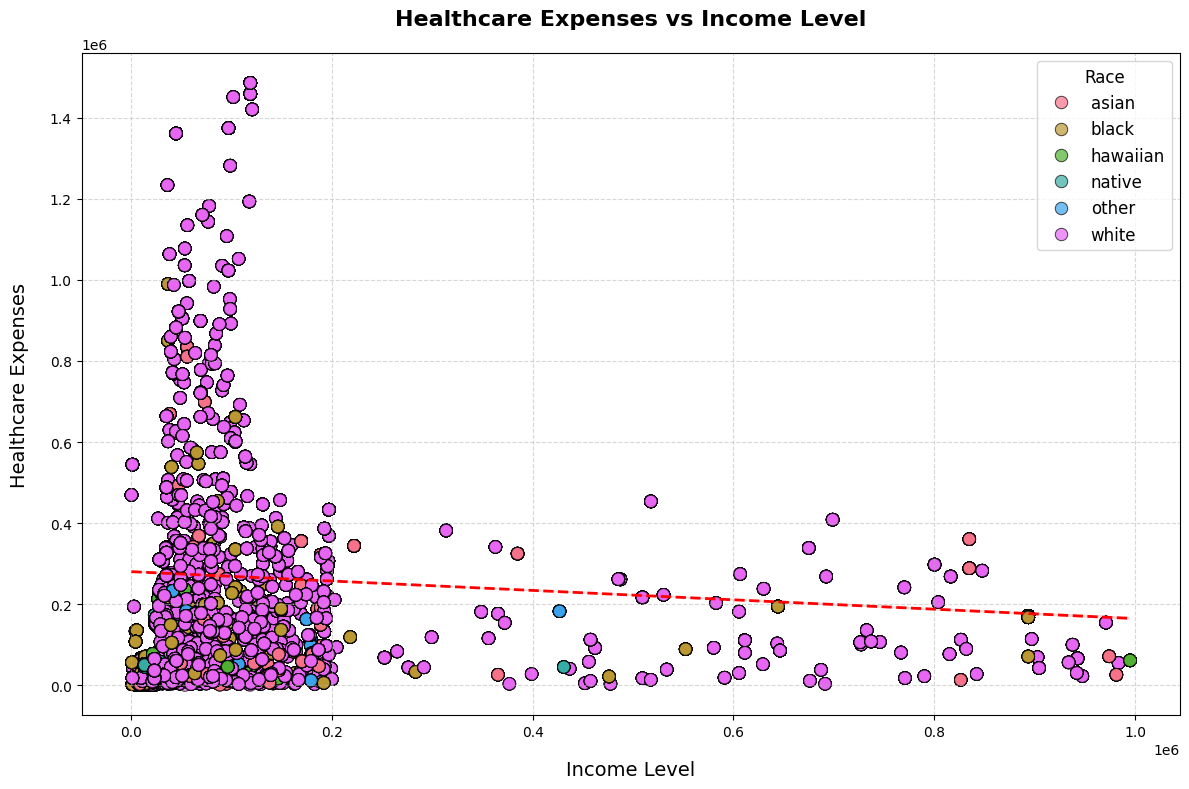

In [ ]:
plt.figure(figsize=(12, 8))

# Scatterplot for Healthcare Expenses vs Income Level with hue by Race
sns.scatterplot(
    data=merged_data,
    x='INCOME',
    y='HEALTHCARE_EXPENSES',
    hue='RACE',
    palette='husl',
    alpha=0.7,
    s=80,
    edgecolor='black'
)

# Add regression line
sns.regplot(
    data=merged_data,
    x='INCOME',
    y='HEALTHCARE_EXPENSES',
    scatter=False,
    color='red',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# Add styling to title and axes
plt.title('Healthcare Expenses vs Income Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Income Level', fontsize=14, labelpad=15)
plt.ylabel('Healthcare Expenses', fontsize=14, labelpad=15)

# Adjust legend placement and styling
plt.legend(
    title='Race',
    fontsize=12,
    title_fontsize=12
)

# Gridlines and layout adjustments
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This scatterplot illustrates the relationship between income levels and healthcare expenses across different racial groups. Each point represents an individual, color-coded by race. The red regression line indicates a slight downward trend, suggesting that as income increases, healthcare expenses tend to decrease marginally. However, the majority of data points are clustered at lower income levels, indicating higher healthcare expenses for low-income groups. This trend is consistent across most racial categories, with some variance observed in expense distribution. The visualization highlights the potential disparities in healthcare spending and access among different socioeconomic and racial groups, providing insights into areas requiring targeted policy interventions.

**Total Claims Cost by Encounter Class**

Visualization Type: Bar Plot

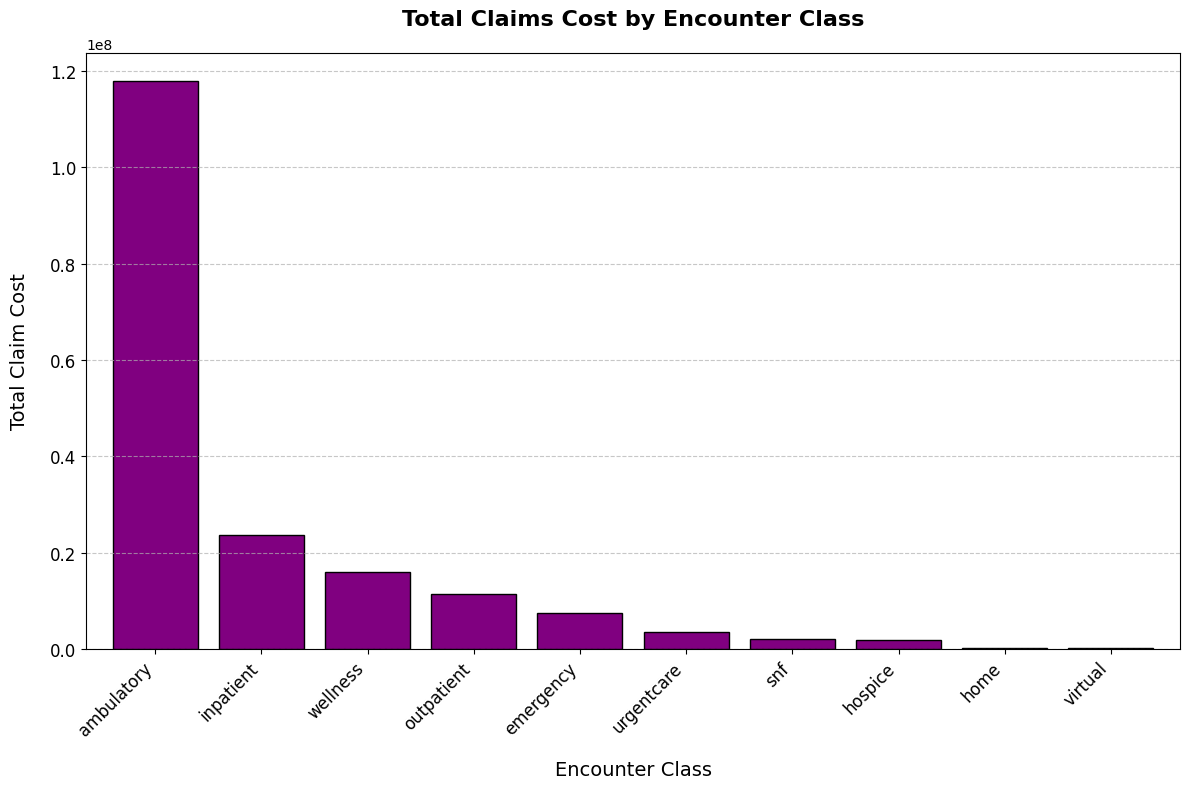

In [ ]:
# Group by Encounter Class and calculate the total claim cost
encounter_costs = merged_data.groupby('ENCOUNTERCLASS')['TOTAL_CLAIM_COST'].sum().sort_values(ascending=False)

# Plot Total Claims Cost by Encounter Class
plt.figure(figsize=(12, 8))
encounter_costs.plot(
    kind='bar',
    color='purple',
    edgecolor='black',
    width=0.8
)

plt.title('Total Claims Cost by Encounter Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Encounter Class', fontsize=14, labelpad=15)
plt.ylabel('Total Claim Cost', fontsize=14, labelpad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Adjust rotation for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()


This bar chart illustrates the total claims cost associated with different encounter classes in the healthcare dataset. The "ambulatory" class significantly dominates the total claims cost, indicating that ambulatory services account for the majority of healthcare expenditures. Other encounter classes, such as "inpatient" and "wellness," show moderate contributions, while classes like "home" and "virtual" have minimal costs. This distribution highlights the importance of ambulatory services in healthcare spending and suggests areas where resource allocation and cost management strategies could be optimized.

**Geographic Healthcare Expenses**

Visualization Type: Choropleth Map



In [ ]:
# Clean the COUNTY field in the dataset and filter for Massachusetts data
merged_data['COUNTY'] = merged_data['COUNTY'].str.replace(" County", "").str.strip()
ma_data = merged_data[merged_data['STATE'] == 'Massachusetts']
county_data = ma_data.groupby('COUNTY')['HEALTHCARE_EXPENSES'].mean().reset_index()

# Merge county data with the GeoJSON data based on the COUNTY name
geojson_df = pd.DataFrame([{
    'COUNTY': feature['properties']['NAME'],
    'geometry': feature['geometry'],
    'properties': feature['properties']
} for feature in mass_geojson["features"]])

# Merging 2

# Merge healthcare data with GeoJSON dataframe
merged_geojson_data = pd.merge(geojson_df, county_data, on='COUNTY', how='left')

# Update GeoJSON features with healthcare expenses
for i, feature in enumerate(mass_geojson["features"]):
    county_name = feature["properties"]["NAME"]
    healthcare_expenses = merged_geojson_data.loc[merged_geojson_data['COUNTY'] == county_name, 'HEALTHCARE_EXPENSES'].values
    if healthcare_expenses.size > 0:
        feature['properties']['HEALTHCARE_EXPENSES'] = healthcare_expenses[0]
    else:
        feature['properties']['HEALTHCARE_EXPENSES'] = None

# Plot the choropleth map
fig = px.choropleth(
    county_data,
    geojson=mass_geojson,
    locations='COUNTY',
    featureidkey="properties.NAME",
    color='HEALTHCARE_EXPENSES',
    color_continuous_scale='Viridis',
    title='Healthcare Expenses by County in Massachusetts'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

This choropleth map visualizes healthcare expenses by county in Massachusetts. Worcester County has the highest healthcare expenses, indicating a significant concentration of healthcare-related costs in this region. On the other hand, Nantucket County exhibits the lowest healthcare expenses, reflecting minimal healthcare spending. This disparity underscores the variation in healthcare resource utilization and associated expenses across the state, which could guide targeted interventions and equitable resource allocation.

**Average healthcare expenses for each age group**

Data Visualization: Bar Plot

<ipython-input-25-cd292d3ebb45>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




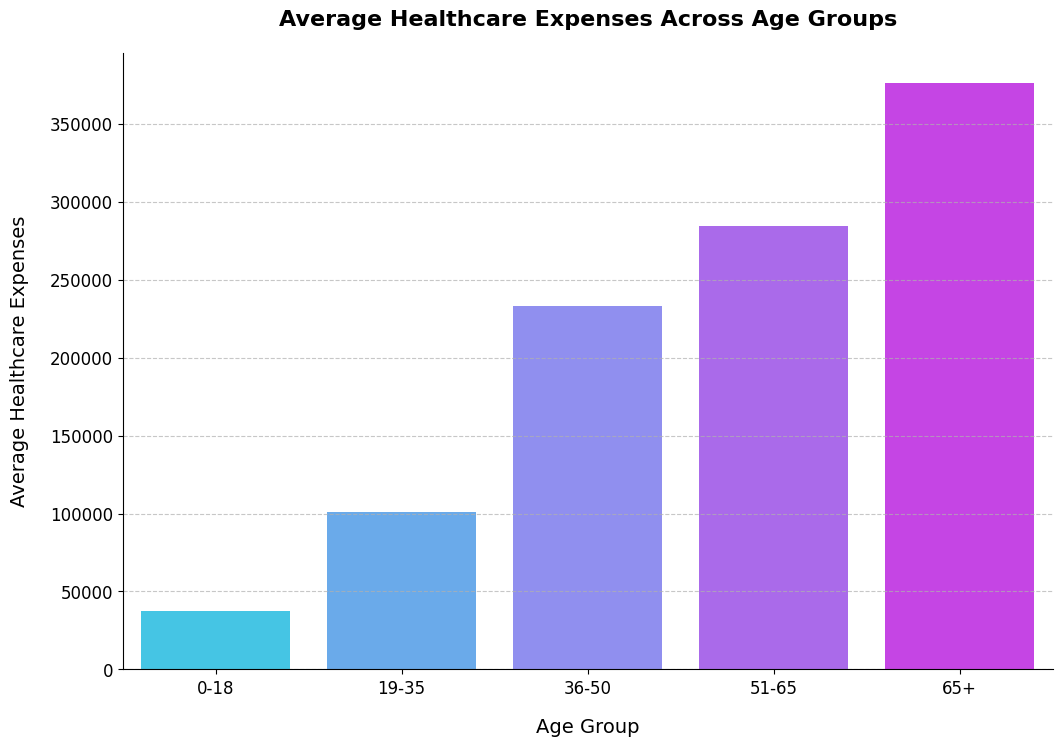

In [ ]:
merged_data['AGE_GROUP'] = pd.cut(
    pd.to_datetime('today').year - pd.to_datetime(merged_data['BIRTHDATE']).dt.year,
    bins=[0, 18, 35, 50, 65, 100],
    labels=['0-18', '19-35', '36-50', '51-65', '65+']
)

# Group by Age Group with observed=True
age_group_expenses = merged_data.groupby('AGE_GROUP', observed=False)['HEALTHCARE_EXPENSES'].mean().reset_index()

# Plot Average Healthcare Expenses Across Age Groups
plt.figure(figsize=(12, 8))
sns.barplot(
    data=age_group_expenses,
    x='AGE_GROUP',
    y='HEALTHCARE_EXPENSES',
    palette='cool',
    hue=None,
    dodge=False
)

# Add styling for better visuals
plt.title('Average Healthcare Expenses Across Age Groups', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=14, labelpad=15)
plt.ylabel('Average Healthcare Expenses', fontsize=14, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.show()


This bar chart illustrates the average healthcare expenses across different age groups. The expenses show a progressive increase with age. The 0-18 age group has the lowest average expenses, likely due to generally better health in younger individuals. The 65+ age group has the highest expenses, reflecting increased healthcare needs and chronic conditions prevalent among the elderly population. This pattern highlights the importance of addressing age-specific healthcare requirements and allocating resources to cater to the varying demands of different age groups effectively.

# **Pivot tables**

In [ ]:
pivot_race_gender = merged_data.pivot_table(
    values='HEALTHCARE_EXPENSES',
    index='RACE',
    columns='GENDER',
    aggfunc='mean',
    observed=False
).round(2)

pivot_race_gender

GENDER,F,M
RACE,,
asian,382481.55,150700.48
black,202834.50,231471.61
hawaiian,85277.87,194455.07
native,92943.02,117930.48
other,112705.21,132499.51
white,351501.18,216263.32



This table highlights the average healthcare expenses distributed across race and gender. Notably, Asian females exhibit the highest average healthcare expenses, significantly outpacing their male counterparts and other racial groups. Conversely, Hawaiian and Native individuals, regardless of gender, have the lowest average expenses. Across all races, males generally incur lower expenses than females, except in the Black population where male healthcare expenses slightly exceed female expenses. These disparities suggest varying healthcare needs and utilization patterns, emphasizing the need for tailored healthcare strategies to address specific racial and gender-based requirements.

In [ ]:
pivot_encounter_age = merged_data.pivot_table(
    values='TOTAL_CLAIM_COST',
    index='ENCOUNTERCLASS',
    columns='AGE_GROUP',
    aggfunc='sum',
    observed=False
).round(2)

pivot_encounter_age

AGE_GROUP,0-18,19-35,36-50,51-65,65+
ENCOUNTERCLASS,,,,,
ambulatory,8773157.33,34105954.52,20152223.19,24848717.26,20927888.66
emergency,481927.85,1339656.11,991264.53,2152009.71,1989744.47
home,0.00,0.00,0.00,8229.06,226050.89
hospice,34061.79,56769.65,40101.39,375111.09,974729.66
inpatient,70405.13,448672.07,873159.24,4391210.03,11981308.45
outpatient,268235.01,1642360.73,3390948.98,3296423.27,2139701.59
snf,173296.49,403804.92,388968.23,356594.67,582949.13
urgentcare,51948.78,128731.93,271748.66,862561.09,1509712.15
virtual,101831.27,42848.40,6007.16,3656.56,5100.76


This table provides a detailed breakdown of healthcare expenses by encounter class across different age groups. Ambulatory services show consistently high costs across all age groups, peaking in the 65+ category, indicating a significant reliance on such services in older populations. Emergency expenses also increase with age, underscoring the growing urgency for healthcare as individuals age. Hospice care and inpatient costs are notably higher in older groups, reflecting the increased need for critical care. Wellness-related expenses are consistently significant across all age groups, highlighting the focus on preventative care. Interestingly, services like virtual healthcare have minimal costs across all age groups, suggesting underutilization. This data emphasizes the varying healthcare requirements and cost patterns associated with different life stages.

In [ ]:
pivot_income_marital = merged_data.pivot_table(
    values='INCOME',
    index='MARITAL',
    columns='GENDER',
    aggfunc='mean',
    observed=False
).round(2)

pivot_income_marital

GENDER,F,M
MARITAL,,
,135856.68,122105.44
Divorced,76546.29,133070.38
Married,106364.38,126861.70
Single,89841.02,161593.15
Widowed,174831.81,186796.48


This table illustrates healthcare expenses segmented by marital status and gender. Widowed individuals, irrespective of gender, incur the highest healthcare expenses, reflecting possibly increased medical needs due to age or lack of spousal support. Married individuals have moderate healthcare expenses, potentially benefiting from shared household resources. Single males exhibit higher costs than single females, while divorced males also show elevated healthcare expenses compared to their female counterparts. These patterns highlight the influence of marital status and gender on healthcare expenditures, suggesting that social and familial structures significantly impact medical needs and financial demands.

# **Conclusion**



In this project, I explored the relationships between socioeconomic factors such as income, education, and race, and their impact on health disparities. Through extensive exploratory data analysis (EDA), pivot tables, and data visualizations, I uncovered significant patterns and disparities in healthcare access, costs, and outcomes across different demographic groups. The analysis revealed that individuals from lower socioeconomic backgrounds often face worse health outcomes, including higher rates of chronic diseases and limited access to healthcare services.

By integrating demographic, healthcare, and geographic data, I was able to identify actionable insights that can help guide policymakers and healthcare providers in addressing these health inequities. My visualizations showed regional variations in healthcare access, highlighting areas where targeted interventions are most needed. This project demonstrates how socioeconomic factors should be considered in healthcare planning and policy-making, and emphasizes the need for equitable resource allocation to reduce disparities and improve health outcomes for underserved communities.